## **QUES 1**

In [901]:
import numpy as np
import pandas as pd 
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

LOAD THE DATASET

In [902]:
iris = pd.read_csv("/content/Iris.csv",index_col='Id')
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


## **BASIC EDA**

In [903]:
iris.shape

(150, 5)

In [904]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [905]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


PREPROCESSING

In [906]:
# from sklearn.preprocessing import OrdinalEncoder
# oe = OrdinalEncoder()
# iris["Species"] = oe.fit_transform(iris[["Species"]])
# iris


NULL COUNT ANALYSIS

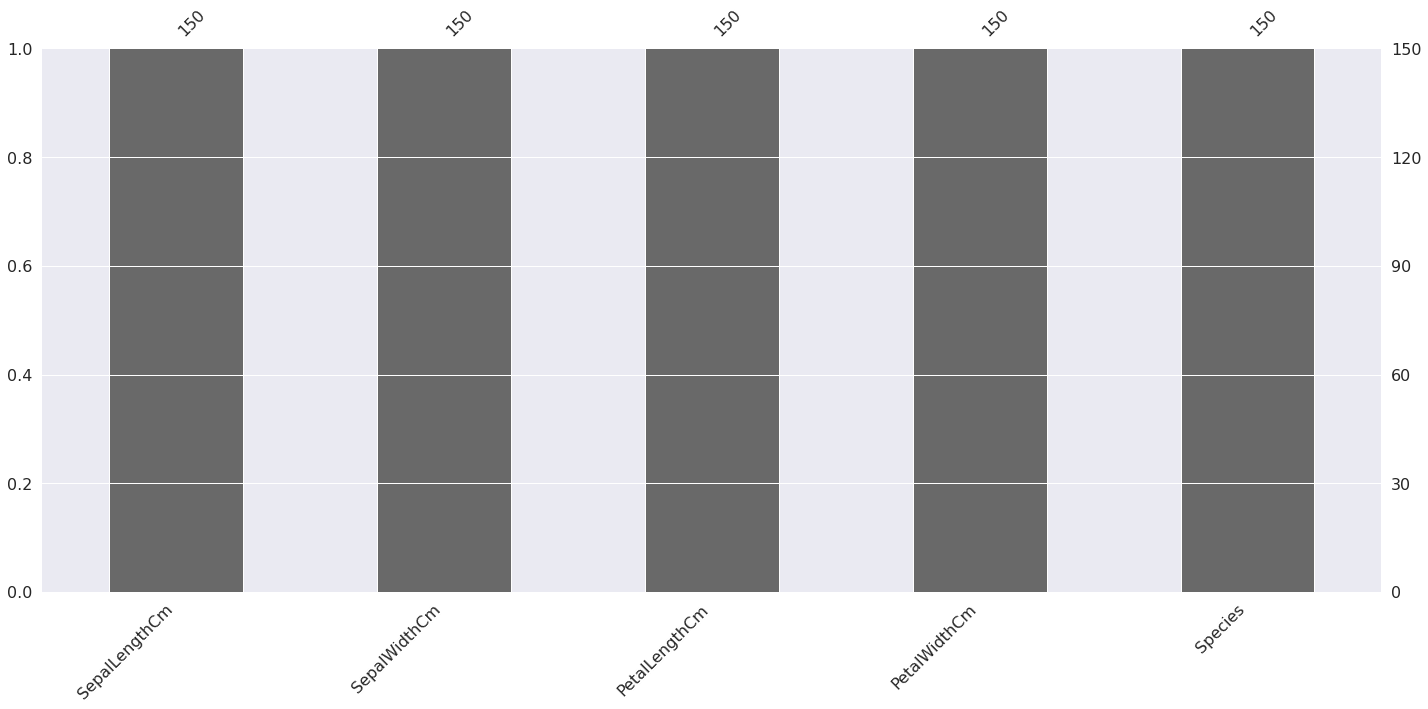

In [907]:
import missingno as msno
p=msno.bar(iris)

SEPARATING INTO INDEPENDENT AND TARGET FEATURES

In [908]:
X = iris.drop(['Species'],axis=1)
y = iris.Species

PLOT FOR IRIS LABELS

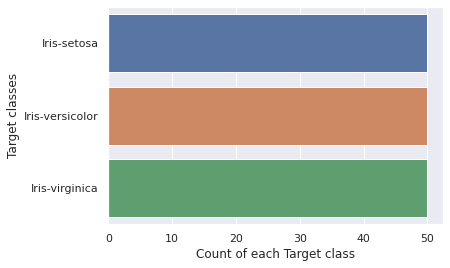

In [909]:
sns.countplot(y=y,data=iris)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

## **DEEP EDA**

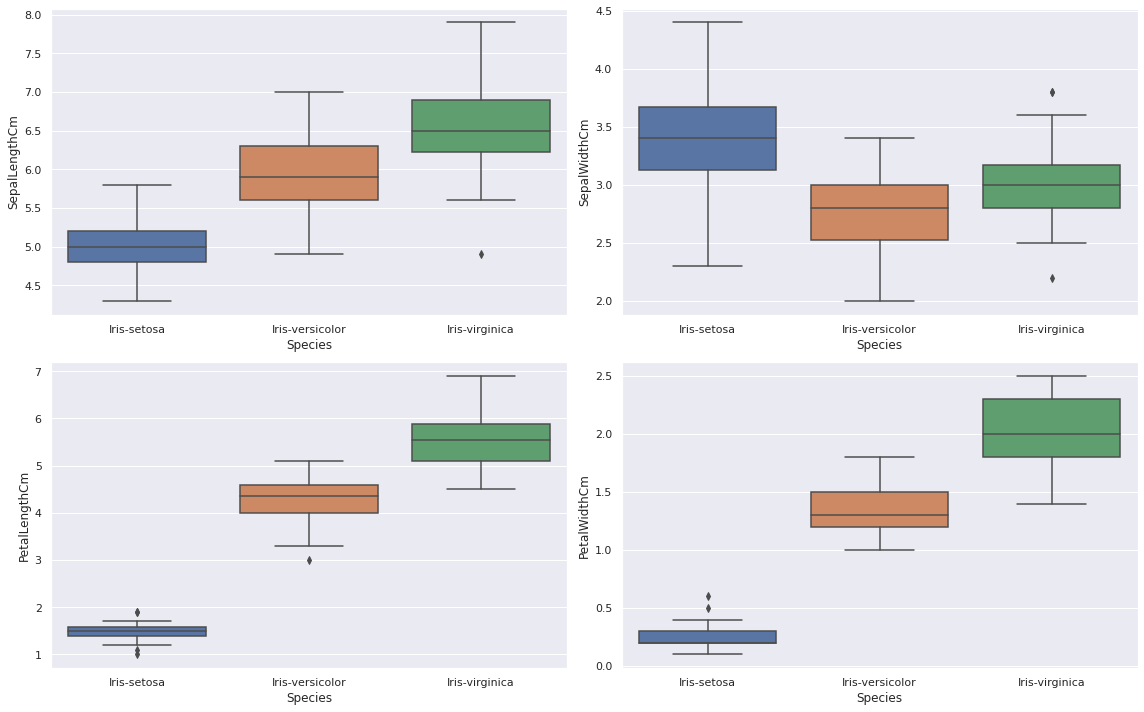

In [910]:
fig,ax = plt.subplots(nrows = 2, ncols=2, figsize=(16,10))
row = 0
col = 0
for i in range(len(iris.columns) -1):
    if col > 1:
        row += 1
        col = 0
    axes = ax[row,col]
    sns.boxplot(x = iris['Species'], y = iris[iris.columns[i]],ax = axes)
    col += 1
plt.tight_layout()
# plt.title("Individual Features by Class")
plt.show()

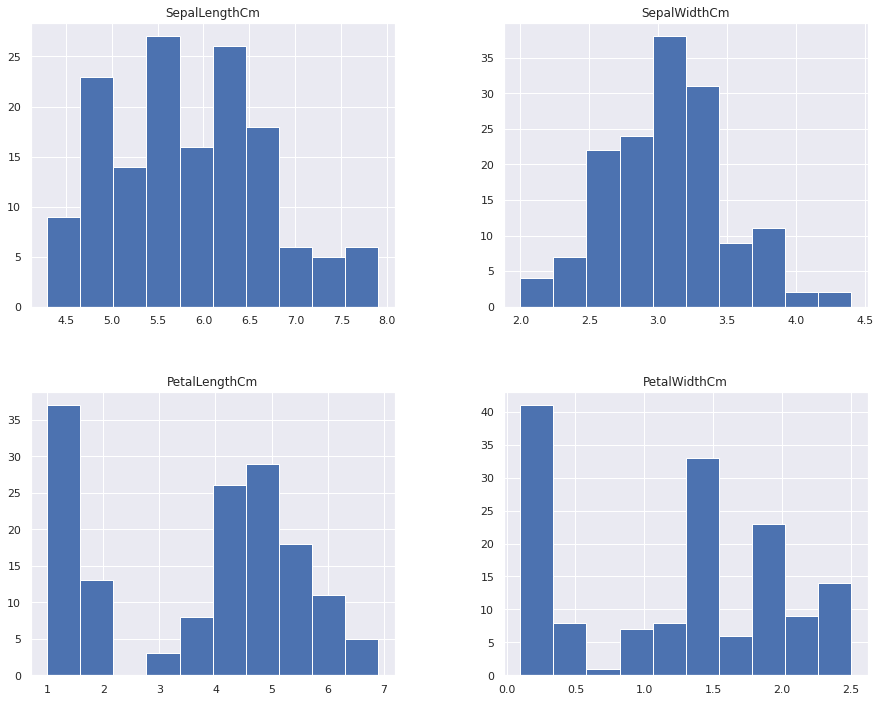

In [911]:
iris.hist(figsize=(15,12))
#plt.title("Features Distribution")
plt.show()

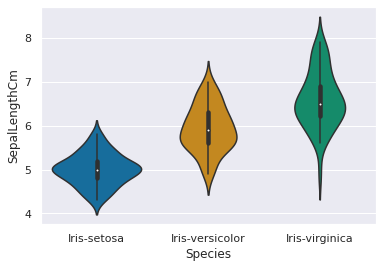

In [912]:
sns.violinplot(x="Species", y="SepalLengthCm", data=iris, size=5,  palette = 'colorblind');

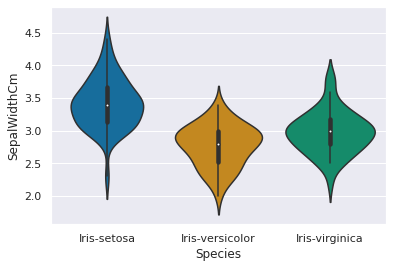

In [913]:
sns.violinplot(x="Species", y="SepalWidthCm", data=iris, size=5,  palette = 'colorblind');

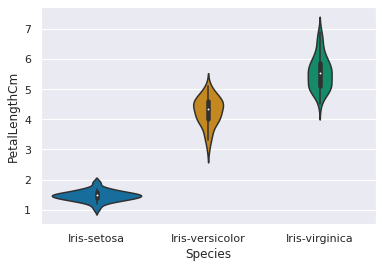

In [914]:
sns.violinplot(x="Species", y="PetalLengthCm", data=iris, size=5,  palette = 'colorblind');

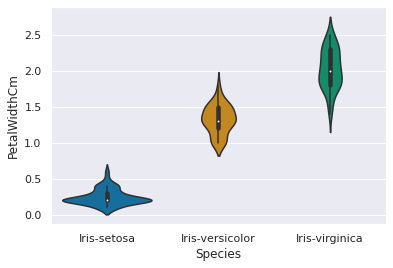

In [915]:
sns.violinplot(x="Species", y="PetalWidthCm", data=iris, size=5,  palette = 'colorblind');

SPLITTING DATA INTO TESTING AND TRAINING DATASET

In [916]:
X = iris.drop(['Species'],axis=1)
y = iris.Species
from sklearn.model_selection import train_test_split
# # 80% training and 20% test
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
X_train_copy = X_train
X_test_copy = X_test
y_train_copy = y_train
y_test_copy = y_test
X_train_copy
# X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
138,6.4,3.1,5.5,1.8
85,5.4,3.0,4.5,1.5
28,5.2,3.5,1.5,0.2
128,6.1,3.0,4.9,1.8
133,6.4,2.8,5.6,2.2
...,...,...,...,...
10,4.9,3.1,1.5,0.1
104,6.3,2.9,5.6,1.8
68,5.8,2.7,4.1,1.0


## **STANDARDIZE THE DATA**

In [917]:
from sklearn.preprocessing import StandardScaler
#object
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## **APPLYING PCA**

In [918]:
from sklearn.decomposition import PCA
pca_1=PCA(whiten=True,n_components=None) 
X_transformed_pca_0 =pca_1.fit_transform(X_train)
X_test_transformed_0 =pca_1.transform(X_test)

VARIANCE CONVERSE OF EACH PRINCIPAL COMPONENT

In [919]:
variance_percent = pca_1.explained_variance_ratio_
print("THE VARIANCE PERCENT FOR BOTH PRINCIPAL COMPONENT")
print(variance_percent)

THE VARIANCE PERCENT FOR BOTH PRINCIPAL COMPONENT
[0.72226528 0.23974795 0.03338117 0.0046056 ]


OVERALL VARIANCE

In [920]:
print("OVERALL VARIANCE")
print(sum(variance_percent))

OVERALL VARIANCE
0.9999999999999999


CUMULATIVE SUM

In [921]:
cum_sum=np.cumsum(np.round(pca_1.explained_variance_ratio_, decimals=3)*100)
print("THE CUMULATIVE SUM OF VARAINCE")
print(cum_sum )#cumulative sum of variance explained with [n] features

THE CUMULATIVE SUM OF VARAINCE
[ 72.2  96.2  99.5 100. ]


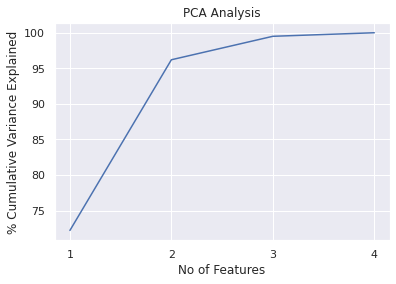

In [922]:
plt.ylabel('% Cumulative Variance Explained')
plt.xlabel('No of Features')
plt.title('PCA Analysis')
plt.xticks(np.arange(0, 4, step=1),(1,2,3,4))
#plt.xlim(1,X.shape[1]+1)
#plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')


plt.plot(cum_sum)
# plt.plot(variance_percent)

In [923]:
print("Variance explained by first principal component",cum_sum[0])
print("Variance explained by first 2 principal component",cum_sum[1])
print("Variance explained by first 3 principal component",cum_sum[2])
print("Variance explained by first 4 principal component",cum_sum[3])

Variance explained by first principal component 72.2
Variance explained by first 2 principal component 96.2
Variance explained by first 3 principal component 99.5
Variance explained by first 4 principal component 100.0


EIGENVALUES

In [924]:
eigenvalues = pca_1.explained_variance_
print("EIGENVALUES ARE")
print(eigenvalues)

EIGENVALUES ARE
[2.91333895 0.96705055 0.13464674 0.01857721]


NO OF EIGENVECTORS

In [925]:
eigen_vector = pca_1.components_
print("THE EIGENVECTORS ARE")
print(eigen_vector)

THE EIGENVECTORS ARE
[[ 0.52843794 -0.23201227  0.58394827  0.5709011 ]
 [ 0.3554837   0.93369239  0.00795684  0.04226763]
 [-0.72859925  0.24803092  0.15153118  0.62021133]
 [ 0.25204725 -0.11344378 -0.79748317  0.53630521]]


PERFORMING PDA AFTER SELECTING NO OF COMPONENTS

In [926]:
from sklearn.decomposition import PCA
pca_2=PCA(whiten=True,n_components=2) 
X_transformed_pca_1 =pca_2.fit_transform(X_train)
X_test_transformed_1 =pca_2.transform(X_test)
pca_2

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True)

In [927]:
cum_sum_1=np.cumsum(np.round(pca_2.explained_variance_ratio_, decimals=3)*100)
print("THE CUMULATIVE SUM OF VARAINCE(PCA)")
print(cum_sum_1 )#cumulative sum of variance explained with [n] features

THE CUMULATIVE SUM OF VARAINCE(PCA)
[72.2 96.2]


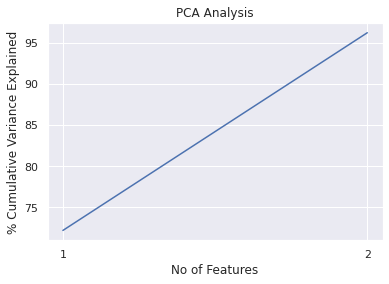

In [928]:
plt.ylabel('% Cumulative Variance Explained')
plt.xlabel('No of Features')
plt.title('PCA Analysis')
plt.xticks(np.arange(0, 4, step=1),(1,2,3,4))
#plt.xlim(1,X.shape[1]+1)
#plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')


plt.plot(cum_sum_1)
# plt.plot(variance_percent)

EIGENVALUES

In [929]:
eigenvalues_1 = pca_2.explained_variance_
print("EIGENVALUES ARE")
print(eigenvalues_1)

EIGENVALUES ARE
[2.91333895 0.96705055]


## **NO OF EIGENVECTORS CONTRIBUTING TO ATLEAST 90% VARIATION OF DATASET**

In [930]:
eigen_vector_1 = pca_2.components_
print("THE EIGENVECTORS ARE")
print(eigen_vector_1)

THE EIGENVECTORS ARE
[[ 0.52843794 -0.23201227  0.58394827  0.5709011 ]
 [ 0.3554837   0.93369239  0.00795684  0.04226763]]


In [931]:
projection_matrix = eigen_vector_1.transpose()
projection_matrix

array([[ 0.52843794,  0.3554837 ],
       [-0.23201227,  0.93369239],
       [ 0.58394827,  0.00795684],
       [ 0.5709011 ,  0.04226763]])

## **FINDING PRIMARY CONTRIBUTORS TO EIGEN VECTORS**

In [932]:
eigen_vector_1[0]

array([ 0.52843794, -0.23201227,  0.58394827,  0.5709011 ])

In [933]:
features = ["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]
elements = eigen_vector_1[0]
print(features[0],":",elements[0])
print(features[1],":",elements[1])
print(features[2],":",elements[2])
print(features[3],":",elements[3])

SepalLengthCm : 0.5284379409692956
SepalWidthCm : -0.23201227156018744
PetalLengthCm : 0.583948266692758
PetalWidthCm : 0.5709011037089845


In [934]:
features = ["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]
elements = eigen_vector_1[0]
print(elements)
# primary_contributors
print("PRIMARY CONTRIBUTORS ARE")
print(features[2],":",elements[2])
print(features[3],":",elements[3])

[ 0.52843794 -0.23201227  0.58394827  0.5709011 ]
PRIMARY CONTRIBUTORS ARE
PetalLengthCm : 0.583948266692758
PetalWidthCm : 0.5709011037089845


In [935]:
#as we can see from the primary contributors to eigen vectors have coefficent 0.58394827 and 0.5709011 which cooresponds to petal length and petal width
correlation = iris['PetalLengthCm'].corr(iris['PetalWidthCm'])
if(correlation>0):
  print("PETAL LENGTH AND PETAL WIDTH ARE POSTIVELY CORRELATED","AND VALUE IS",correlation)
elif(correlation <0):
  print("PETAL LENGTH AND PETAL WIDTH ARE NEGATIVELY CORRELATED","AND VALUE IS",correlation)
else:
  print("PETAL LENGTH AND PETAL WIDTH ARE NOT CORRELATED","AND VALUE IS",correlation)

PETAL LENGTH AND PETAL WIDTH ARE POSTIVELY CORRELATED AND VALUE IS 0.9627570970509663


## **PLOT FOR THE TRANSFORMED DATA USING FIRST TWO EIGEN VECTORS**

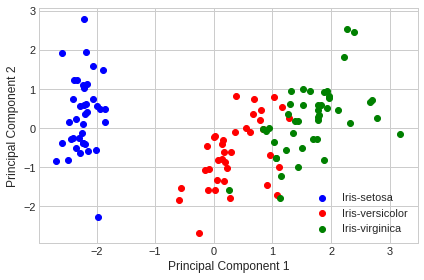

In [936]:
Class = X_train.dot(projection_matrix)
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'red', 'green')):
        plt.scatter(Class[y_train==lab, 0],
                    Class[y_train==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

## ***QUES 2***

In [937]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_1 = LinearDiscriminantAnalysis(n_components=2)
X_transformed_lda = lda_1.fit(X_train, y_train).transform(X_train)
X_test_transformed_2 =lda_1.transform(X_test)

In [938]:
variance_percent_lda = lda_1.explained_variance_ratio_
print("THE VARIANCE PERCENT FOR BOTH PRINCIPAL COMPONENT")
print(variance_percent_lda)

THE VARIANCE PERCENT FOR BOTH PRINCIPAL COMPONENT
[0.99128129 0.00871871]


In [939]:
cum_sum_lda_1=np.cumsum(np.round(lda_1.explained_variance_ratio_, decimals=3)*100)
print("THE CUMULATIVE SUM OF VARAINCE")
print(cum_sum_lda_1 )#cumulative sum of variance explained with [n] features

THE CUMULATIVE SUM OF VARAINCE
[ 99.1 100. ]


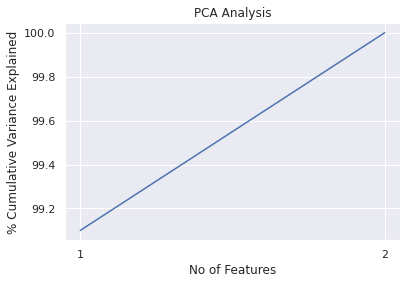

In [940]:
plt.ylabel('% Cumulative Variance Explained')
plt.xlabel('No of Features')
plt.title('PCA Analysis')
plt.xticks(np.arange(0, 4, step=1),(1,2,3,4))
#plt.xlim(1,X.shape[1]+1)
#plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')


plt.plot(cum_sum_lda_1)
# plt.plot(variance_percent)

## **COMPARISIN OF PCA AND LDA**

In [941]:
print("the classifier for pca")
print(pca_2)
print("  ")
print("the classifer for lda")
print(lda_1)

the classifier for pca
PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True)
  
the classifer for lda
LinearDiscriminantAnalysis(n_components=2, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)


In [942]:
variance_percent_1 = pca_2.explained_variance_ratio_
print("THE VARIANCE PERCENT FOR BOTH PRINCIPAL COMPONENT(PCA)")
print(variance_percent_1)

THE VARIANCE PERCENT FOR BOTH PRINCIPAL COMPONENT(PCA)
[0.72226528 0.23974795]


In [943]:
cum_sum_1=np.cumsum(np.round(pca_2.explained_variance_ratio_, decimals=3)*100)
print("THE CUMULATIVE SUM OF VARAINCE(PCA)")
print(cum_sum_1 )#cumulative sum of variance explained with [n] features

THE CUMULATIVE SUM OF VARAINCE(PCA)
[72.2 96.2]


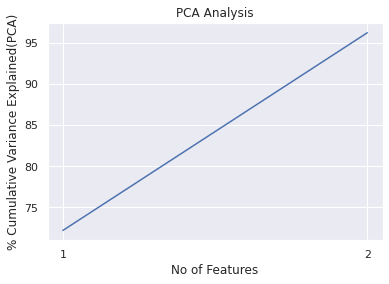

In [944]:
plt.ylabel('% Cumulative Variance Explained(PCA)')
plt.xlabel('No of Features')
plt.title('PCA Analysis')
plt.xticks(np.arange(0, 4, step=1),(1,2,3,4))
#plt.xlim(1,X.shape[1]+1)
#plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')


plt.plot(cum_sum_1)
# plt.plot(variance_percent)

In [945]:
variance_percent_2 = lda_1.explained_variance_ratio_
print("THE VARIANCE PERCENT FOR BOTH LINEAR DISCRIMINANT(LDA)")
print(variance_percent_2)

THE VARIANCE PERCENT FOR BOTH LINEAR DISCRIMINANT(LDA)
[0.99128129 0.00871871]


In [946]:
cum_sum_lda_1=np.cumsum(np.round(lda_1.explained_variance_ratio_, decimals=3)*100)
print("THE CUMULATIVE SUM OF VARAINCE(LDA)")
print(cum_sum_lda_1 )#cumulative sum of variance explained with [n] features

THE CUMULATIVE SUM OF VARAINCE(LDA)
[ 99.1 100. ]


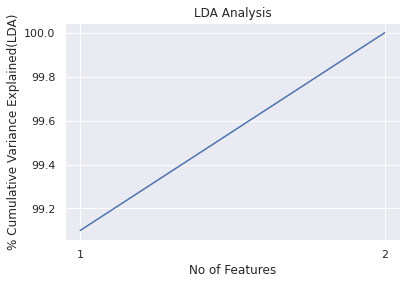

In [947]:
plt.ylabel('% Cumulative Variance Explained(LDA)')
plt.xlabel('No of Features')
plt.title('LDA Analysis')
plt.xticks(np.arange(0, 4, step=1),(1,2,3,4))
#plt.xlim(1,X.shape[1]+1)
#plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')


plt.plot(cum_sum_lda_1)
# plt.plot(variance_percent)

## **PLOT USING FIRST TWO PRINCIPAL COMPONENTS AND FIRST TWO LINEAR DISCRIMINANT**

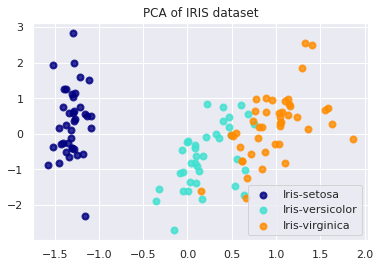

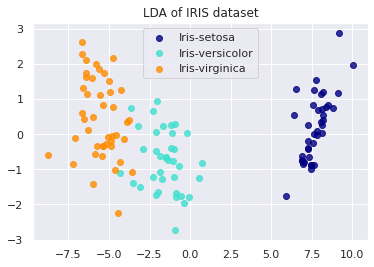

In [948]:

plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'), y_train):
    plt.scatter(X_transformed_pca_1[y_train == i, 0], X_transformed_pca_1[y_train == i, 1], color=color, alpha=.8, lw=lw,
                label=i)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

plt.figure()
for color, i, target_name in zip(colors, ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'), y):
    plt.scatter(X_transformed_lda[y_train == i, 0], X_transformed_lda[y_train == i, 1], alpha=.8, color=color,
                label=i)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')

plt.show()

In [949]:
#IF WE CLEARLY OBSERVE BOTH THE PLOTS WE CAN CONCLUDE THAT LDA SEPARATES THE FEATURE MORE ACCURATELY THAN PCA AS WE CAN SEE for CLASS 
# IRIS-VERSICOLOR THAT IT IS CLEARLY SEPARATED WHEN APPLIED LDA BUT SOME OF IT DATAPOINTS MERGE OR OVERLAP WITH IRIS-VIRGINICA WHEN APPLID PCA

## **TRAINING OF BAYES CLASSIFIER AND COMPARISON OF PERFORMANCE WITHOUT PCA AND LDA AND WITH PCA AND LDA**

In [950]:
from sklearn.naive_bayes import GaussianNB

#Fit model
model_NB = GaussianNB(priors = None)
model_NB.fit(X_train_copy,y_train_copy)

GaussianNB(priors=None, var_smoothing=1e-09)

In [951]:
print("Predictions using Naive Bayes on original features")
y_pred = model_NB.predict(X_test_copy)
print(y_pred)

Predictions using Naive Bayes on original features
['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa']


In [952]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("The Confusion Matrix is")
print(cm)

The Confusion Matrix is
[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]


In [953]:
# model_NB.score(X_test_copy,y_test_copy)
from sklearn.metrics import accuracy_score
print("THE ACCURACY SCORE FOR NAIVE BAYES WITH ORIGINAL FEATURES:",accuracy_score(y_test, y_pred))

THE ACCURACY SCORE FOR NAIVE BAYES WITH ORIGINAL FEATURES: 0.9666666666666667


In [954]:
model_NB_transformed_pca = GaussianNB(priors = None)
model_NB_transformed_pca.fit(X_transformed_pca_1,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [955]:
print("Predictions using Naive Bayes after applying PCA")
y_pred_pca = model_NB_transformed_pca.predict(X_test_transformed_1)
print(y_pred_pca)

Predictions using Naive Bayes after applying PCA
['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa']


In [956]:
# model_NB_transformed_pca.score(X_test_transformed_1,y_test)
cm_pca = confusion_matrix(y_test, y_pred_pca)
print("The Confusion Matrix is(PCA)")
print(cm_pca)

The Confusion Matrix is(PCA)
[[11  0  0]
 [ 0 11  2]
 [ 0  2  4]]


In [957]:
print("THE ACCURACY SCORE FOR NAIVE BAYES AFTER APPLYING PCA:",accuracy_score(y_test, y_pred_pca))

THE ACCURACY SCORE FOR NAIVE BAYES AFTER APPLYING PCA: 0.8666666666666667


In [958]:
model_NB_transformed_lda = GaussianNB(priors = None)
model_NB_transformed_lda.fit(X_transformed_lda,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [959]:
print("Predictions using Naive Bayes after applying LDA")
y_pred_lda = model_NB_transformed_lda.predict(X_test_transformed_2)
print(y_pred_lda)

Predictions using Naive Bayes after applying LDA
['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa']


In [960]:
# model_NB_transformed_lda.score(X_test_transformed_2,y_test)
cm_lda= confusion_matrix(y_test, y_pred_lda)
print("The Confusion Matrix(LDA) is")
print(cm_lda)

The Confusion Matrix(LDA) is
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [961]:
print("THE ACCURACY SCORE FOR NAIVE BAYES AFTER APPLYING LDA:",accuracy_score(y_test, y_pred_lda))

THE ACCURACY SCORE FOR NAIVE BAYES AFTER APPLYING LDA: 1.0


**EXTRA ANALYSIS**

In [962]:
from sklearn.cluster import KMeans
#Fit model
model_KMeans = KNeighborsClassifier(n_neighbors=5)
model_KMeans.fit(X_train_copy,y_train_copy)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [963]:
print("Predictions using Naive KMenas on original features")
y_pred_K = model_KMeans.predict(X_test_copy)
print(y_pred_K)

Predictions using Naive KMenas on original features
['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa']


In [964]:
from sklearn.metrics import confusion_matrix
cm_K = confusion_matrix(y_test, y_pred_K)
print("The Confusion Matrix is")
print(cm_K)

The Confusion Matrix is
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


In [965]:
print("THE ACCURACY SCORE FOR Kmeans WITH ORIGINAL FEATURES:",accuracy_score(y_test, y_pred_K))

THE ACCURACY SCORE FOR Kmeans WITH ORIGINAL FEATURES: 0.9666666666666667


In [966]:
model_K_transformed_pca = KNeighborsClassifier(n_neighbors=5)
model_K_transformed_pca.fit(X_transformed_pca_1,y_train)

y_pred_pca_K = model_K_transformed_pca.predict(X_test_transformed_1)

cm_pca_K = confusion_matrix(y_test, y_pred_pca_K)
print("The Confusion Matrix is(PCA)-->KMEANS")
print(cm_pca_K)

print("THE ACCURACY SCORE FOR KMEANS AFTER APPLYING PCA:",accuracy_score(y_test, y_pred_pca_K))

The Confusion Matrix is(PCA)-->KMEANS
[[11  0  0]
 [ 0 11  2]
 [ 0  0  6]]
THE ACCURACY SCORE FOR KMEANS AFTER APPLYING PCA: 0.9333333333333333


In [967]:
model_K_transformed_lda =  KNeighborsClassifier(n_neighbors=5)
model_K_transformed_lda.fit(X_transformed_lda,y_train)

y_pred_lda_K = model_K_transformed_lda.predict(X_test_transformed_2)

cm_lda_K= confusion_matrix(y_test, y_pred_lda_K)
print("The Confusion Matrix(LDA)  FOR KMEANS is")
print(cm_lda_K)

print("THE ACCURACY SCORE FOR KMEANS AFTER APPLYING LDA:",accuracy_score(y_test, y_pred_lda_K))

The Confusion Matrix(LDA)  FOR KMEANS is
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
THE ACCURACY SCORE FOR KMEANS AFTER APPLYING LDA: 1.0


## ***QUES 3***

In [968]:
diabetes = pd.read_csv("/content/diabetes.csv")
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## **BASIC EDA**

In [969]:
diabetes.shape

(768, 9)

In [970]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [971]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


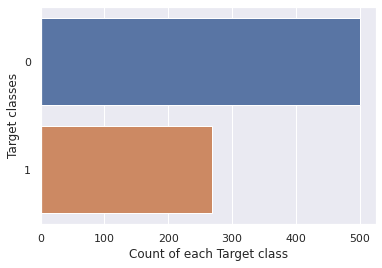

In [972]:
sns.countplot(y=diabetes.Outcome,data=diabetes)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

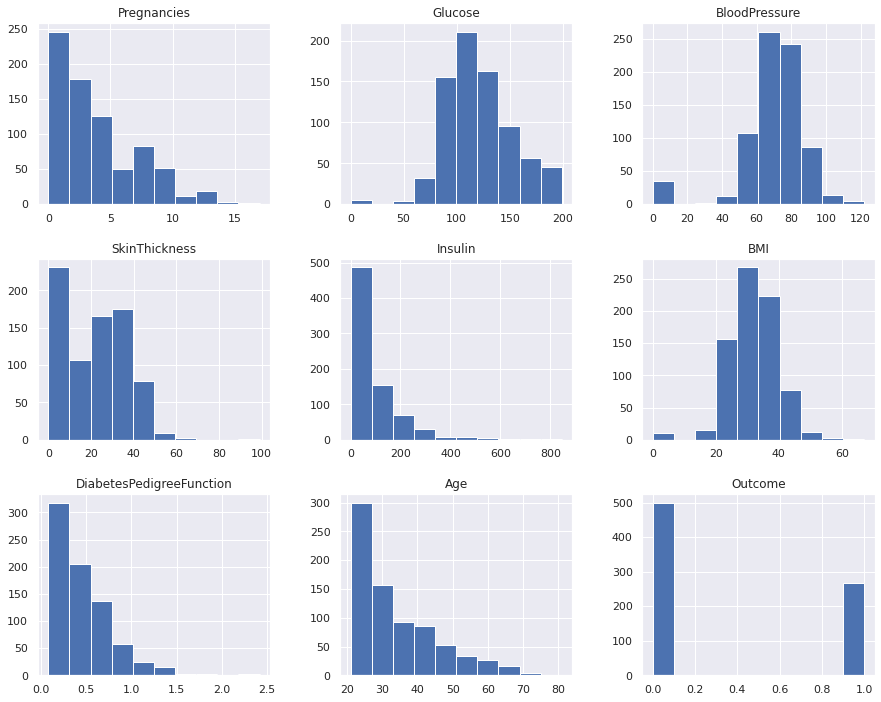

In [973]:
diabetes.hist(figsize=(15,12))
#plt.title("Features Distribution")
plt.show()

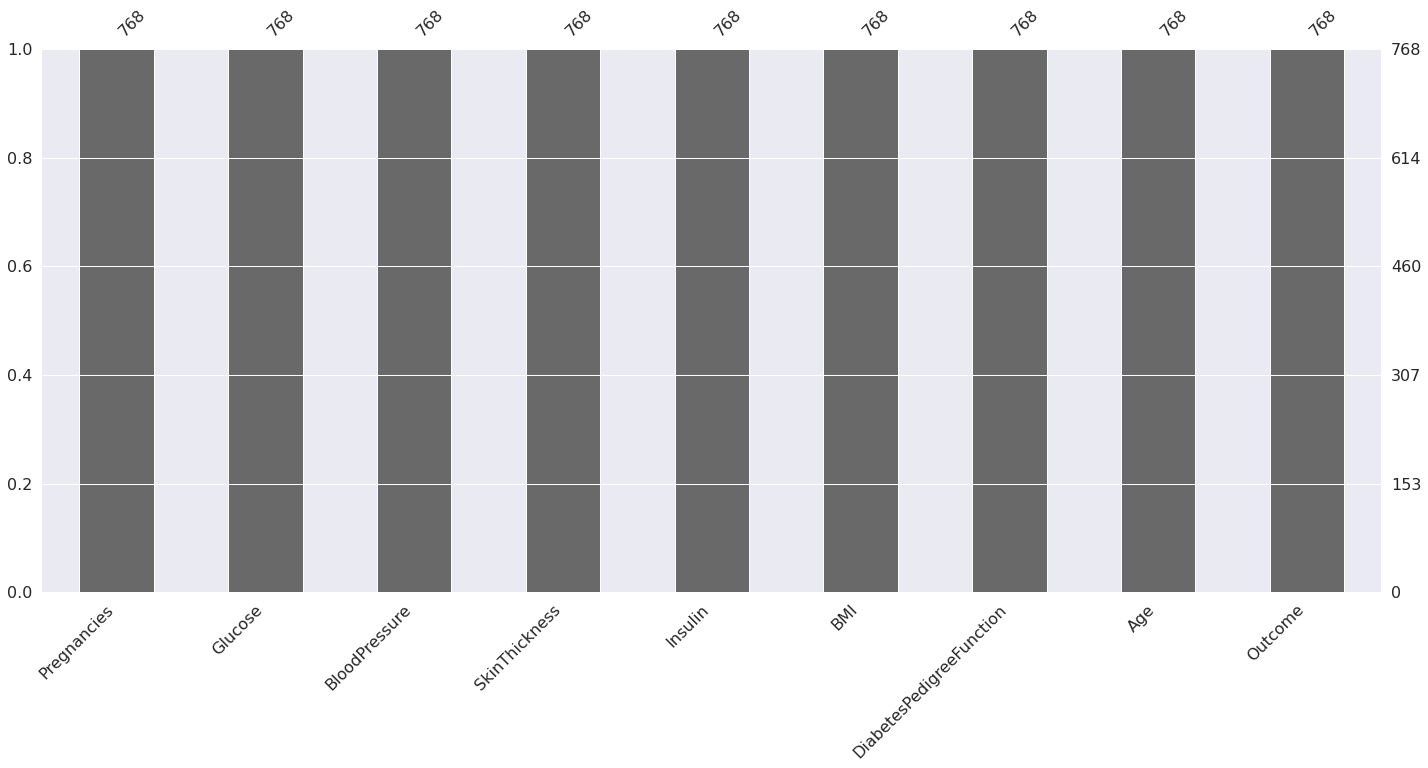

In [974]:
import missingno as msno
p=msno.bar(diabetes)

In [975]:
diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Checking for certain invalid readings

In [976]:
#as we know in general that the blood pressure of a person cannot be zero,means there is something wrong in data so counting no of zeros based on class
print("the no of points for which blood pressure =0 grouped according to outcome")
print(diabetes[diabetes.BloodPressure == 0].groupby('Outcome')['Age'].count())
print(" ")

#as we know that the glucose level of person cannot be zero even after fasting,hence 0 is invalid reading
print("the no of points for which glucose =0 grouped according to outcome")
print(diabetes[diabetes.Glucose == 0].groupby('Outcome')['Age'].count())
print(" ")

#For normal people, skin fold thickness can’t be less than 10 mm better yet zero
print("the no of points for whichskin thickness =0 grouped according to outcome")
print(diabetes[diabetes.SkinThickness == 0].groupby('Outcome')['Age'].count())
print(" ")

#BMI cannot not be 0 or close to zero unless the person is really underweight
print("the no of points for which BMI =0 grouped according to outcome")
print(diabetes[diabetes.BMI == 0].groupby('Outcome')['Age'].count())
print(" ")

#in normal cases we dont see insulin to be zero
print("the no of points for which insulin =0 grouped according to outcome")
print(diabetes[diabetes.Insulin == 0].groupby('Outcome')['Age'].count())

the no of points for which blood pressure =0 grouped according to outcome
Outcome
0    19
1    16
Name: Age, dtype: int64
 
the no of points for which glucose =0 grouped according to outcome
Outcome
0    3
1    2
Name: Age, dtype: int64
 
the no of points for whichskin thickness =0 grouped according to outcome
Outcome
0    139
1     88
Name: Age, dtype: int64
 
the no of points for which BMI =0 grouped according to outcome
Outcome
0    9
1    2
Name: Age, dtype: int64
 
the no of points for which insulin =0 grouped according to outcome
Outcome
0    236
1    138
Name: Age, dtype: int64


Removing the rows where BMI, Glucose, Blood Pressure are zero

In [977]:
diabetes_modified = diabetes[(diabetes.BloodPressure != 0) & (diabetes.BMI != 0) & (diabetes.Glucose != 0)]
print(diabetes_modified.shape)

(724, 9)


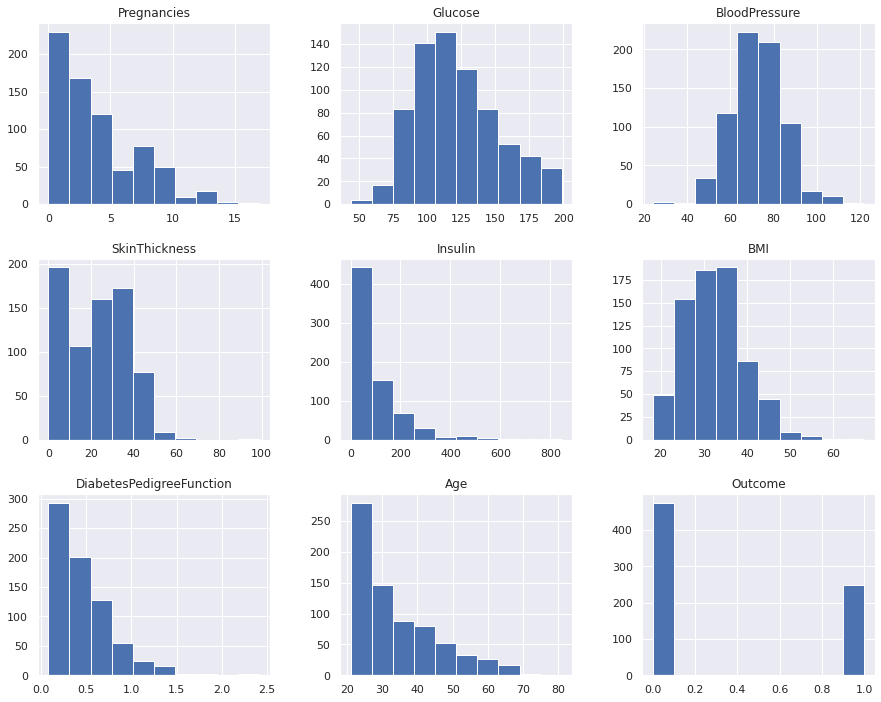

In [978]:
diabetes_modified.hist(figsize=(15,12))
#plt.title("Features Distribution")
plt.show()

In [979]:
X_diab = diabetes_modified.drop(['Outcome'],axis=1)
y_diab = diabetes_modified.Outcome
X_diab

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [980]:
from sklearn.feature_selection import  mutual_info_classif,f_classif
from sklearn.feature_selection import SelectKBest

## **IDENTIFICATION OF FEATURES USING MUTUAL_INFO_CLASSIF,RFE**

Feature 0: 0.027905
Feature 1: 0.118360
Feature 2: 0.037016
Feature 3: 0.018402
Feature 4: 0.055538
Feature 5: 0.070010
Feature 6: 0.024759
Feature 7: 0.072784


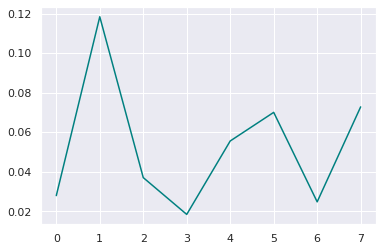

In [981]:
fs = SelectKBest(score_func=mutual_info_classif, k='all')
fs.fit(X_diab, y_diab)
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
plt.plot(fs.scores_,color='teal')

In [982]:
model_select = LinearRegression()
rfe = RFE(model_select)
fit_rfe = rfe.fit(X_diab, y_diab)

df_RFE_results = []
for i in range(X_diab.shape[1]):
    df_RFE_results.append(
        {      
            'Feature_names': diabetes_modified.columns[i],
            'Selected':  rfe.support_[i],
            'RFE_ranking':  rfe.ranking_[i],
        }
    )

df_RFE_results = pd.DataFrame(df_RFE_results)
df_RFE_results.index.name='Columns'
df_RFE_results

,Feature_names,Selected,RFE_ranking
Columns,,,
0,Pregnancies,True,1
1,Glucose,True,1
2,BloodPressure,False,3
3,SkinThickness,False,5
4,Insulin,False,4
5,BMI,True,1
6,DiabetesPedigreeFunction,True,1
7,Age,False,2


## **Calculate and compare the  accuracy and F1 score by both the methods and with the classifier learned using all the features**

MODEL BUILT USING ALL FEATURES

In [983]:
X_train_diab, X_test_diab, y_train_diab, y_test_diab = train_test_split(X_diab, y_diab, test_size=0.33, random_state=1)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

model_KNN = KNeighborsClassifier(n_neighbors=3)
model_KNN.fit(X_train_diab, y_train_diab)
# print(model_KNN.score(X_test_diab,y_test_diab))
ypred_KNN = model_KNN.predict(X_test_diab)
accuracy_KNN = accuracy_score(y_test_diab, ypred_KNN)
print('Accuracy(KNN): %f' % accuracy_KNN)
f1_KNN = f1_score(y_test_diab, ypred_KNN)
print('F1 score(KNN): %f' % f1_KNN)

Accuracy(KNN): 0.694561
F1 score(KNN): 0.540881


In [984]:
# feature selection
def select_features_selectk(X_train, y_train, X_test):
	# configure to select a subset of features
	fs = SelectKBest(score_func=mutual_info_classif, k=4)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs


X_train_diab_1, X_test_diab_1, y_train_diab_1, y_test_diab_1 = train_test_split(X_diab, y_diab, test_size=0.33, random_state=1)
# feature selection
X_train_info, X_test_info, info = select_features_selectk(X_train_diab_1, y_train_diab_1, X_test_diab_1)
model_KNN_fs  =  KNeighborsClassifier(n_neighbors=3)
model_KNN_fs.fit(X_train_info, y_train_diab_1)
# print(model_KNN.score(X_test_info,y_test_diab_1))
ypred_KNN_fs = model_KNN_fs.predict(X_test_info)
accuracy_KNN_fs = accuracy_score(y_test_diab_1, ypred_KNN_fs)
print('Accuracy(KNN) after feature selection method 1: %f' % accuracy_KNN_fs)
f1_KNN_fs = f1_score(y_test_diab_1, ypred_KNN_fs)
print('F1 score(KNN) after feature selection method 1: %f' % f1_KNN_fs)

Accuracy(KNN) after feature selection method 1: 0.761506
F1 score(KNN) after feature selection method 1: 0.641509


In [985]:
def select_features_rfe(X_train, y_train, X_test):
  model_select_2 = LinearRegression()
  rfe = RFE(model_select_2,5)
  fit_rfe_2 = rfe.fit(X_train, y_train)
  X_train_fs = rfe.transform(X_train)
  # transform test input data
  X_test_fs = rfe.transform(X_test)
  return X_train_fs, X_test_fs,rfe


X_train_diab_2, X_test_diab_2, y_train_diab_2, y_test_diab_2 = train_test_split(X_diab, y_diab, test_size=0.33, random_state=1)
# feature selection
X_train_info_1, X_test_info_1, info_1 = select_features_rfe(X_train_diab_2, y_train_diab_2, X_test_diab_2)
model_KNN_fs_1  =  KNeighborsClassifier(n_neighbors=3)
model_KNN_fs_1.fit(X_train_info_1, y_train_diab_2)
# print(model_KNN.score(X_test_info,y_test_diab_1))
ypred_KNN_fs_1 = model_KNN_fs_1.predict(X_test_info_1)
accuracy_KNN_fs_1 = accuracy_score(y_test_diab_2, ypred_KNN_fs_1)
print('Accuracy(KNN) after feature selection method 2: %f' % accuracy_KNN_fs_1)
f1_KNN_fs_1 = f1_score(y_test_diab_1, ypred_KNN_fs_1)
print('F1 score(KNN) after feature selection method 2: %f' % f1_KNN_fs_1)

Accuracy(KNN) after feature selection method 2: 0.761506
F1 score(KNN) after feature selection method 2: 0.641509


**EXTRA ANALYSIS FOR F_CALSSIF FOR KNN**



Feature 0: 38.290564
Feature 1: 226.152520
Feature 2: 20.637931
Feature 3: 6.167243
Feature 4: 15.612888
Feature 5: 71.080260
Feature 6: 25.571087
Feature 7: 46.402860


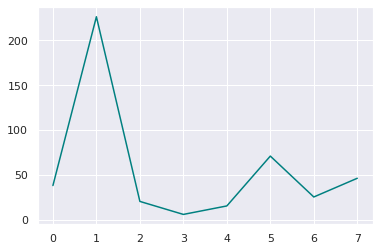

In [986]:
f_classif_fs = SelectKBest(score_func=f_classif, k='all')
selected_features_list =f_classif_fs.fit(X_diab, y_diab)

for i in range(len(f_classif_fs.scores_)):
	print('Feature %d: %f' % (i, f_classif_fs.scores_[i]))
plt.plot(f_classif_fs.scores_,color='teal')

In [900]:
def select_features_F(X_train, y_train, X_test):
  # learn relationship from training data
  fs = SelectKBest(score_func=f_classif, k=4)
  fs.fit(X_train, y_train)
  # transform train input data
  X_train_fs = fs.transform(X_train)
  # transform test input data
  X_test_fs = fs.transform(X_test)
  return X_train_fs, X_test_fs, fs


X_train_diab_0, X_test_diab_0, y_train_diab_0, y_test_diab_0 = train_test_split(X_diab, y_diab, test_size=0.33, random_state=1)
# feature selection
X_train_info_0, X_test_info_0, info_0 = select_features_F(X_train_diab_0, y_train_diab_0, X_test_diab_0)
model_KNN_fs_0  =  KNeighborsClassifier(n_neighbors=3)
model_KNN_fs_0.fit(X_train_info_0, y_train_diab_0)
# print(model_KNN.score(X_test_info,y_test_diab_1))
ypred_KNN_fs_0 = model_KNN_fs.predict(X_test_info_0)
accuracy_KNN_fs_0 = accuracy_score(y_test_diab_0, ypred_KNN_fs_0)
print('Accuracy(KNN) after feature selection method 0: %f' % accuracy_KNN_fs_0)
f1_KNN_fs_0 = f1_score(y_test_diab_1, ypred_KNN_fs)
print('F1 score(KNN) after feature selection method 0: %f' % f1_KNN_fs_0)

Accuracy(KNN) after feature selection method 0: 0.761506
F1 score(KNN) after feature selection method 0: 0.641509


**EXTRA ANALYSIS USING RANDOM FOREST FOR MUTUAL INFO, RFE**

In [987]:
X_train_diab_RF, X_test_diab_RF, y_train_diab, y_test_diab_RF = train_test_split(X_diab, y_diab, test_size=0.33, random_state=1)

from sklearn.ensemble import RandomForestClassifier
clf_random = RandomForestClassifier(max_depth=2, random_state=0)
clf_random.fit(X_diab, y_diab)

ypred_RF = clf_random.predict(X_test_diab_RF)
accuracy_RF = accuracy_score(y_test_diab_RF, ypred_RF)
print('Accuracy(RF): %f' % accuracy_RF)
f1_KNN = f1_score(y_test_diab_RF, ypred_RF)
print('F1 score(RF): %f' % f1_KNN)

Accuracy(RF): 0.707113
F1 score(RF): 0.444444


In [988]:
X_train_diab_RF_1, X_test_diab_RF_1, y_train_diab_RF_1, y_test_diab_RF_1 = train_test_split(X_diab, y_diab, test_size=0.33, random_state=1)
# feature selection
X_train_RF_info, X_test_RF_info, info_RF = select_features_selectk(X_train_diab_RF_1, y_train_diab_RF_1, X_test_diab_RF_1)
model_RF_fs  =  RandomForestClassifier(max_depth=2, random_state=0)
model_RF_fs.fit(X_train_RF_info, y_train_diab_RF_1)
# print(model_KNN.score(X_test_info,y_test_diab_1))
ypred_RF_fs = model_RF_fs.predict(X_test_RF_info)
accuracy_RF_fs = accuracy_score(y_test_diab_RF_1, ypred_RF_fs)
print('Accuracy(RF) after feature selection method 1: %f' % accuracy_RF_fs)
f1_RF_fs = f1_score(y_test_diab_RF_1, ypred_RF_fs)
print('F1 score(RF) after feature selection method 1: %f' % f1_RF_fs)

Accuracy(RF) after feature selection method 1: 0.715481
F1 score(RF) after feature selection method 1: 0.507246


In [989]:
X_train_diab_RF_2, X_test_diab_RF_2, y_train_diab_RF_2, y_test_diab_RF_2 = train_test_split(X_diab, y_diab, test_size=0.33, random_state=1)
# feature selection
X_train_RF_info_1, X_test_RF_info_1, info_RF_1 = select_features_rfe(X_train_diab_RF_2, y_train_diab_RF_2, X_test_diab_RF_2)
model_RF_fs_1  =  RandomForestClassifier(max_depth=2, random_state=0)
model_RF_fs_1.fit(X_train_RF_info_1, y_train_diab_RF_2)
# print(model_KNN.score(X_test_info,y_test_diab_1))
ypred_RF_fs_1 = model_RF_fs_1.predict(X_test_RF_info_1)
accuracy_RF_fs_1 = accuracy_score(y_test_diab_RF_2, ypred_RF_fs_1)
print('Accuracy(RF) after feature selection method 2: %f' % accuracy_RF_fs_1)
f1_RF_fs_1 = f1_score(y_test_diab_RF_2, ypred_RF_fs_1)
print('F1 score(RF) after feature selection method 2: %f' % f1_RF_fs_1)

Accuracy(RF) after feature selection method 2: 0.698745
F1 score(RF) after feature selection method 2: 0.462687


## **Use Pearson Correlation and compute correlated features with a threshold of 70%.**

In [990]:
corr_p = diabetes_modified.corr(method ='pearson')
corr_p

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.134915,0.209668,-0.095683,-0.080059,0.012342,-0.025996,0.557066,0.224417
Glucose,0.134915,1.000000,0.223331,0.074381,0.337896,0.223276,0.136630,0.263560,0.488384
BloodPressure,0.209668,0.223331,1.000000,0.011777,-0.046856,0.287403,-0.000075,0.324897,0.166703
SkinThickness,-0.095683,0.074381,0.011777,1.000000,0.420874,0.401528,0.176253,-0.128908,0.092030
Insulin,-0.080059,0.337896,-0.046856,0.420874,1.000000,0.191831,0.182656,-0.049412,0.145488
BMI,0.012342,0.223276,0.287403,0.401528,0.191831,1.000000,0.154858,0.020835,0.299375
DiabetesPedigreeFunction,-0.025996,0.136630,-0.000075,0.176253,0.182656,0.154858,1.000000,0.023098,0.184947
Age,0.557066,0.263560,0.324897,-0.128908,-0.049412,0.020835,0.023098,1.000000,0.245741
Outcome,0.224417,0.488384,0.166703,0.092030,0.145488,0.299375,0.184947,0.245741,1.000000


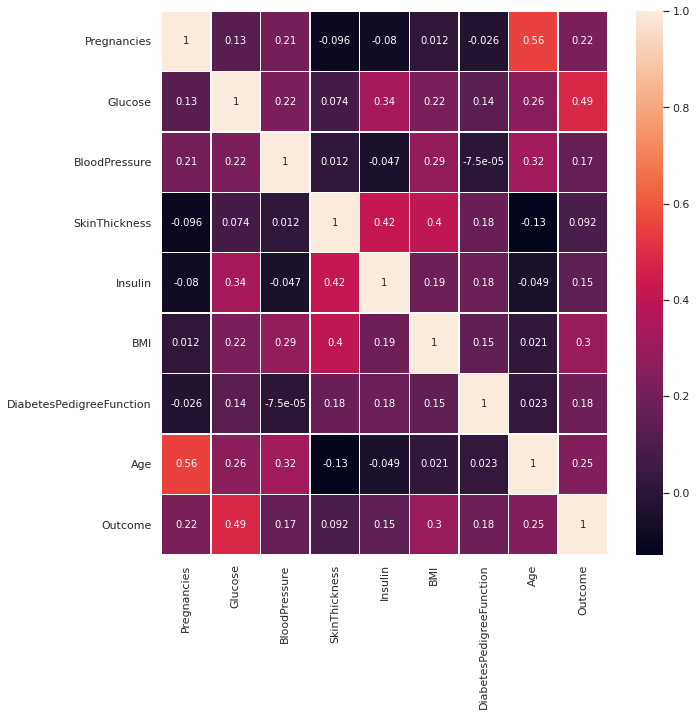

In [991]:
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(corr_p, annot=True,linewidths=0.5,ax=ax)
plt.show()

In [992]:
corr_p.values>0.7

array([[ True, False, False, False, False, False, False, False, False],
       [False,  True, False, False, False, False, False, False, False],
       [False, False,  True, False, False, False, False, False, False],
       [False, False, False,  True, False, False, False, False, False],
       [False, False, False, False,  True, False, False, False, False],
       [False, False, False, False, False,  True, False, False, False],
       [False, False, False, False, False, False,  True, False, False],
       [False, False, False, False, False, False, False,  True, False],
       [False, False, False, False, False, False, False, False,  True]])

In [993]:
corr_p_temp  = np.array(corr_p)
for i in range(len(corr_p_temp)):
  for j in range(1,len(corr_p_temp)):
    if(corr_p_temp[i][j]>0.7):
      print(corr_p_temp[i][j])

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
